In [1]:
conda install -c conda-forge imbalanced-learn

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::pdpbox==0.2.1=pyhd8ed1ab_0
  - conda-forge/noarch::imbalanced-learn==0.7.0=py_1
  - defaults/noarch::category_encoders==2.2.2=pyhd3eb1b0_0
  - defaults/osx-64::xgboost==1.5.0=py39hecd8cb5_1
  - defaults/osx-64::shap==0.39.0=py39hb2f4e1b_0
  - defaults/osx-64::scikit-learn-intelex==2021.3.0=py39hecd8cb5_0
  - defaults/osx-64::anaconda==2021.11=py39_0
  - defaults/osx-64::py-xgboost==1.5.0=py39hecd8cb5_1
done

## Package Plan ##

  environment location: /Users/jasongersing/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2021.11  |           py39_0           7 KB
    anaconda-custom            |           py39_1           4 KB
    ca-ce

In [2]:
conda install -c conda-forge pdpbox

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [49]:
conda install -c conda-forge ipywidgets

Solving environment: done

## Package Plan ##

  environment location: /Users/jasongersing/opt/anaconda3

  added / updated specs:
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ipywidgets-7.6.5           |     pyhd8ed1ab_0         101 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         101 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ipywidgets         pkgs/main::ipywidgets-7.6.5-pyhd3eb1b~ --> conda-forge::ipywidgets-7.6.5-pyhd8ed1ab_0



ipywidgets-7.6.5     | 101 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import ipywidgets
import shap
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

In [48]:
df = pd.read_csv('/Users/jasongersing/Desktop/DS Projects/WA_Fn-UseC_-HR-Employee-Attrition 2.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [49]:
def wrangle(df):
    
    # Dropping columns with high number of NaN values
    df.dropna(axis=1, thresh=500, inplace = True)
        
    # Dropping columns with unique values
    df.drop(columns=['EmployeeNumber'], inplace=True)
    
    # Dropping columns with constant values
    df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

    # Clean binary encoded columns
    df['Attrition'] = (df['Attrition'] == 'Yes').astype(int)
    df['Gender'] = (df['Gender'] == 'Male').astype(int)
    df['MaritalStatus'] = (df['MaritalStatus'] == 'Married').astype(int)
    df['OverTime'] = (df['OverTime'] == 'Yes').astype(int)
    
    # Brute force OneHotEncoder
    dept = ['Research & Development', 'Sales', 'Human Resources']
    for dept in df['Department']:
      df[dept] = (df['Department'].str.contains(dept, regex=True)).astype(int)

    field = ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources']
    for field in df['EducationField']:
      df[field] = (df['EducationField'].str.contains(dept, regex=True)).astype(int)

    role = ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufactoring Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
    for role in df['JobRole']:
      df[role] = (df['JobRole'].str.contains(dept, regex=True)).astype(int)

    # Brute force OrdinalEncoder
    df['BusinessTravel'] = pd.factorize(df['BusinessTravel'])[0]

    df = df.drop(columns=['Department', 'EducationField', 'JobRole'])
    
    
    return df

df = wrangle(df)

In [50]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Marketing,Technical Degree,Sales Executive,Research Scientist,Laboratory Technician,Manufacturing Director,Healthcare Representative,Manager,Sales Representative,Research Director
0,41,1,0,1102,1,2,2,0,94,3,...,0,0,0,0,0,0,0,0,0,0
1,49,0,1,279,8,1,3,1,61,2,...,0,0,0,0,0,0,0,0,0,0
2,37,1,0,1373,2,2,4,1,92,2,...,0,0,0,0,0,0,0,0,0,0
3,33,0,1,1392,3,4,4,0,56,3,...,0,0,0,0,0,0,0,0,0,0
4,27,0,0,591,2,1,1,1,40,3,...,0,0,0,0,0,0,0,0,0,0


In [51]:
target = 'Attrition'
y = df[target]
X = df.drop(columns=[target])

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.4, random_state=42)

In [53]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=.5, random_state=42)

In [54]:
# Sanity check
len(X_train) + len(X_val) + len(X_test) == len(X)

True

In [55]:
X.shape, X_train.shape, X_val.shape, X_test.shape

((1470, 43), (882, 43), (294, 43), (294, 43))

In [56]:
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.8231292517006803


In [57]:
# two classes
# imbalanced

In [58]:
# create dataframe to organize values
data_table = pd.DataFrame()

data_table['technique'] = ['Original Data']
data_table['X_shape'] = [X_train.shape[0]]
data_table['y_shape'] = [y_train.shape[0]]
data_table['target_0'] = [y_train.value_counts()[0]]
data_table['target_1'] = [y_train.value_counts()[1]]

data_table

,technique,X_shape,y_shape,target_0,target_1
0,Original Data,882,882,726,156


In [59]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [60]:
new_row = {
    'technique': 'SMOTE - minority',
    'X_shape' : X_train_smote.shape[0],
    'y_shape' : y_train_smote.shape[0],
    'target_0' : y_train_smote.value_counts()[0],
    'target_1' : y_train_smote.value_counts()[1]
}

data_table = data_table.append(new_row, ignore_index=True)

data_table

,technique,X_shape,y_shape,target_0,target_1
0,Original Data,882,882,726,156
1,SMOTE - minority,1452,1452,726,726


In [61]:
# Model 1: Logistic Regression
model_lr = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)

model_lr.fit(X_train_smote, y_train_smote);

In [62]:
# Model 2: Random Forest
model_rf = make_pipeline(
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

model_rf.fit(X_train_smote, y_train_smote);

In [63]:
# Model 3: XGBoost

model_xgb = make_pipeline(
    SimpleImputer(strategy='mean'),
    XGBClassifier(random_state=42,n_estimator=75, n_jobs=-1, learning_rate=.2) #learning rate = 0.01, 0.1,0.2
)

model_xgb.fit(X_train, y_train)

[12:10:00] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:10:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimator=75,
                               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbo

In [64]:
print('Training Accuracy (LOGR):', model_lr.score(X_train_smote, y_train_smote))
print('Validation Accuracy (LOGR):', model_lr.score(X_val, y_val))

Training Accuracy (LOGR): 0.8677685950413223
Validation Accuracy (LOGR): 0.8163265306122449


In [65]:
print('Training Accuracy (RF):', model_rf.score(X_train_smote, y_train_smote))
print('Validation Accuracy (RF):', model_rf.score(X_val, y_val))

Training Accuracy (RF): 1.0
Validation Accuracy (RF): 0.8605442176870748


In [66]:
print('Training Accuracy (XGB):', model_xgb.score(X_train_smote, y_train_smote))
print('Validation Accuracy (XGB):', model_xgb.score(X_val, y_val))

Training Accuracy (XGB): 0.8512396694214877
Validation Accuracy (XGB): 0.8843537414965986


Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       256
           1       0.34      0.45      0.39        38

    accuracy                           0.82       294
   macro avg       0.63      0.66      0.64       294
weighted avg       0.84      0.82      0.83       294



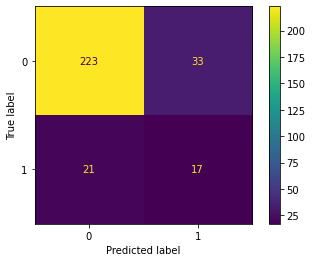

In [67]:
print('Logistic Regression')
print(classification_report(y_val, model_lr.predict(X_val)))
plot_confusion_matrix(model_lr, X_val, y_val);

Random Forest
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       256
           1       0.44      0.29      0.35        38

    accuracy                           0.86       294
   macro avg       0.67      0.62      0.64       294
weighted avg       0.84      0.86      0.85       294



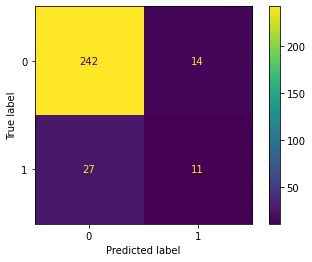

In [68]:
print('Random Forest')
print(classification_report(y_val, model_rf.predict(X_val)))
plot_confusion_matrix(model_rf, X_val, y_val);

XG Boost
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       256
           1       0.64      0.24      0.35        38

    accuracy                           0.88       294
   macro avg       0.77      0.61      0.64       294
weighted avg       0.86      0.88      0.86       294



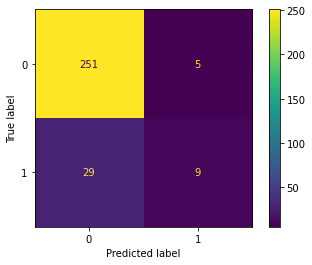

In [69]:
print('XG Boost')
print(classification_report(y_val, model_xgb.predict(X_val)))
plot_confusion_matrix(model_xgb, X_val, y_val);

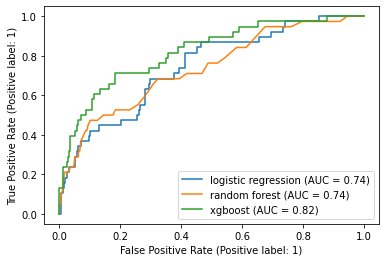

In [70]:
lr = plot_roc_curve(model_lr,
               X_val,
               y_val,
               name='logistic regression');

rf = plot_roc_curve(model_rf,
               X_val,
               y_val,
               ax=lr.ax_,
               name='random forest');

xgb = plot_roc_curve(model_xgb,
               X_val,
               y_val,
               ax=lr.ax_,
               name='xgboost');

Text(0, 0.5, 'Feature')

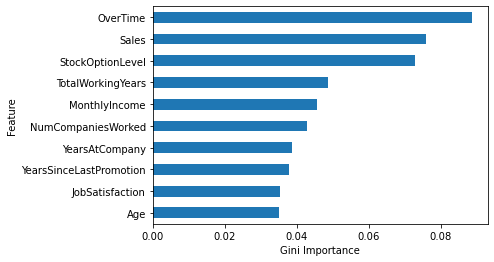

In [71]:
importances = model_xgb.named_steps['xgbclassifier'].feature_importances_
feature_names =X_train_smote.columns
feat_imp= pd.Series(data=importances, index=feature_names).sort_values()
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')

In [72]:
model_perm = make_pipeline(
    SimpleImputer(strategy='mean'),
    XGBClassifier(random_state=42,n_estimator=75, n_jobs=-1, learning_rate=.2) 
)

model_perm.fit(X_train_smote, y_train_smote)

[12:10:01] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:10:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimator=75,
                               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbo

In [73]:
model_perm.score(X_val, y_val)

0.8571428571428571

In [74]:
col = 'MonthlyIncome'
X_val_perm = X_val.copy()
X_val_perm[col] = np.random.permutation(X_val_perm[col])

In [75]:
model_perm.score(X_val_perm, y_val)

0.8469387755102041

In [76]:
perm_imp = permutation_importance(model_perm, X_val, y_val,random_state=42)
perm_imp

{'importances_mean': array([ 0.00680272,  0.0047619 , -0.00068027,  0.00272109,  0.00068027,
         0.00612245, -0.00340136, -0.00136054,  0.00272109,  0.00068027,
         0.01020408,  0.00340136,  0.01156463, -0.00748299, -0.00136054,
         0.02312925, -0.00068027,  0.00136054, -0.00340136,  0.0047619 ,
         0.00884354,  0.00680272,  0.00748299, -0.00272109,  0.00884354,
        -0.00272109,  0.00136054,  0.03401361,  0.02176871,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]),
 'importances_std': array([0.003726  , 0.00272109, 0.00451241, 0.00396663, 0.00451241,
        0.0062348 , 0.003726  , 0.00630858, 0.00254535, 0.00254535,
        0.0130853 , 0.0077563 , 0.00552656, 0.00451241, 0.00821976,
        0.00585192, 0.00254535, 0.00272109, 0.00430242, 0.00700383,
        0.00630858, 0.003726  , 0.00451241, 0.00254535, 

In [77]:
data_perm = {'imp_mean':perm_imp['importances_mean'],
             'imp_std':perm_imp['importances_std']}


df_perm = pd.DataFrame(data_perm, index=X_val.columns).sort_values('imp_mean')

In [78]:
df_perm

,imp_mean,imp_std
MonthlyRate,-0.007483,0.004512
RelationshipSatisfaction,-0.003401,0.004302
Gender,-0.003401,0.003726
YearsAtCompany,-0.002721,0.002545
YearsSinceLastPromotion,-0.002721,0.002545
HourlyRate,-0.001361,0.006309
NumCompaniesWorked,-0.001361,0.008220
DailyRate,-0.000680,0.004512
PercentSalaryHike,-0.000680,0.002545
Technical Degree,0.000000,0.000000


In [79]:
col = 'Age'
X_val_perm = X_val.copy()
X_val_perm[col] = np.random.permutation(X_val_perm[col])

In [80]:
model_perm.score(X_val_perm, y_val)

0.8571428571428571

In [81]:
feature = 'MonthlyIncome'

In [82]:
isolate= pdp_isolate(
    model_xgb,
    dataset= X_val, 
    model_features=X_val.columns,
    feature=feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='MonthlyIncome'>})

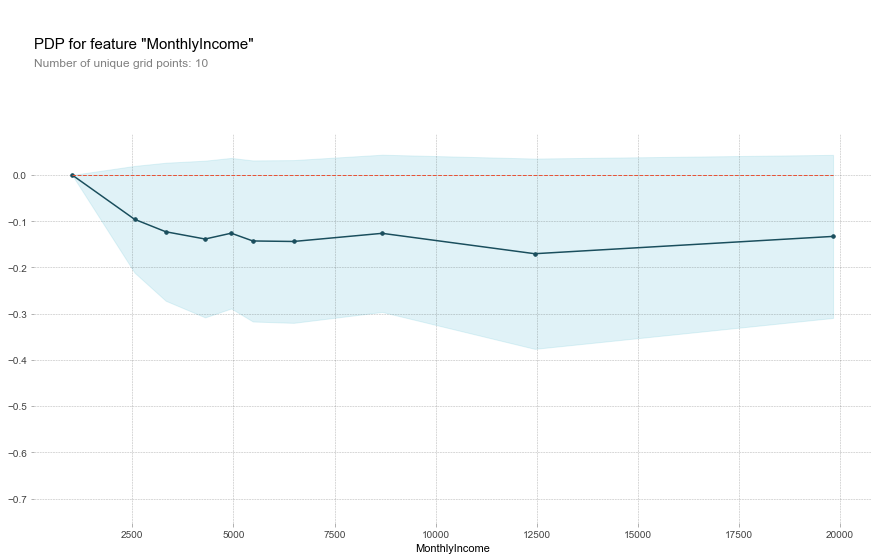

In [83]:
pdp_plot(isolate, feature_name=feature)

In [84]:
feature = 'Age'

In [85]:
isolate= pdp_isolate(
    model_xgb,
    dataset= X_val, 
    model_features=X_val.columns,
    feature=feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Age'>})

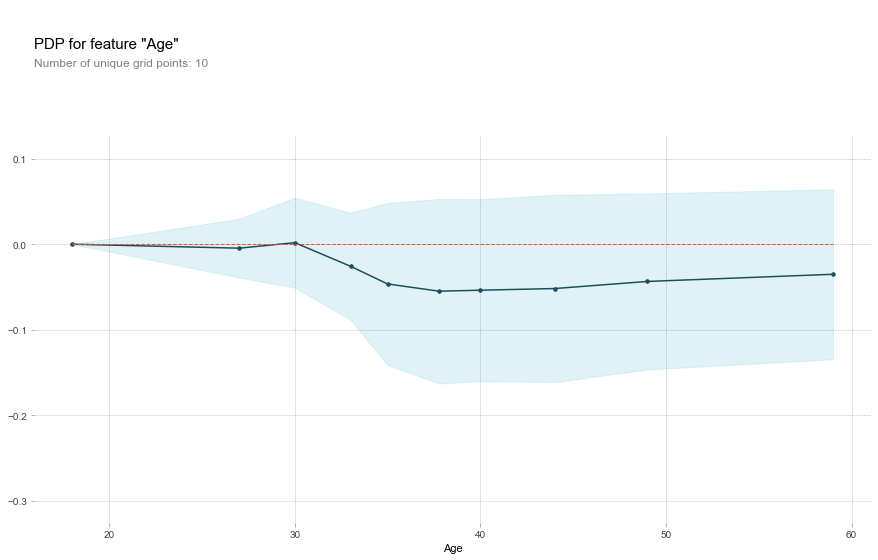

In [86]:
pdp_plot(isolate, feature_name=feature)

In [87]:
features = ['Age','MonthlyIncome']

In [88]:
interact= pdp_interact(
    model_xgb,
    dataset= X_val, 
    model_features=X_val.columns,
    features=features
)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_inter_ax': <AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>})

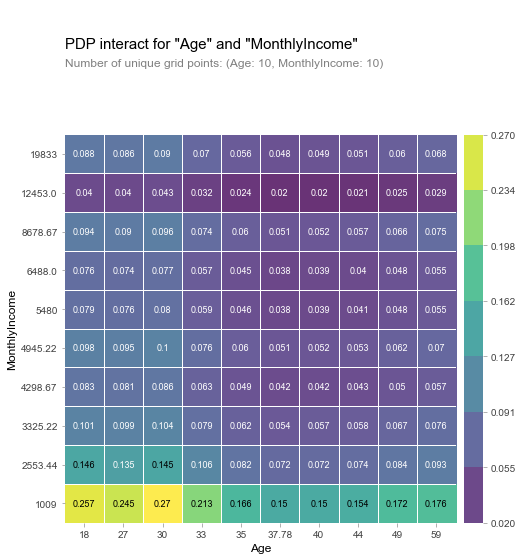

In [89]:
pdp_interact_plot(interact,plot_type='grid', feature_names=features)

In [90]:
sample_row = X_val.tail(1)

In [91]:
sample_row

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Marketing,Technical Degree,Sales Executive,Research Scientist,Laboratory Technician,Manufacturing Director,Healthcare Representative,Manager,Sales Representative,Research Director
607,49,0,1184,11,3,3,0,43,3,3,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# shap_values = explainer.shap_values(sample_row)

#  
# 
# 

# shap.initjs() #initialization of java script.
# shap.force_plot(
#     base_value= explainer.expected_value,
#     shap_values=shap_values,
#     features=sample_row
# # 